---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

# Brief Introduction

On this page, we are going to perform exploratory data anlysis (EDA) in order to get an initial sense of what the dataset looks like and understand what methods we can take moving forward. We will look at the main variables of the datasets, identifying patterns and potential issues along the way. We will summarize key characteristic and potenital anomalies. The process will be broken up into the following stages: Univariate Analysis, Bivariate and Multivariate Analysis, Statistical Insights, and Concluding Remarks. 

To understand the followings visualizations and discussion, it is pertinent to first delve into the underlying data. As we have discussed in the data collection section of the website, this data was scraped from Yelp.com utilizing an API. The data is contains information about specific restaurants on the Yelp website, therefore, the unit of observation is a particular restaurant. All the restaurants are located in the DC area and the data contains a total of 737 individual and unique restaurants.

The end goal of this EDA section is to better understand the underlying data and determine if we are able to move forward with answering our key data science questions. We will now begin the investigation of the yelp dataset.

# Methods and Code

The first step is to simply import the necessary Python libraries and read-in the cleaned Yelp data (see the cleaning tab for further explanation on the cleaning process).

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


# reading in the data
yelp_zip = pd.read_csv("../data-cleaning/clean_yelp_zip.csv")

Now that we have read-in the cleaned Yelp data, we can begin by simply looking at the data types for each variable as well as a small portion of the data to get an idea of what the full dataset looks like. 

In [364]:
cols_to_drop = "Unnamed: 0"
yelp_zip = yelp_zip.drop(columns=cols_to_drop)
print(len(yelp_zip))
print(yelp_zip.dtypes)
print(len(yelp_zip))
print(yelp_zip.head(5))

450
Median_Income      int64
zip_code         float64
name              object
cuisine           object
price_range        int64
rating           float64
review_count     float64
latitude         float64
longitude        float64
price            float64
cuisine_cat       object
dtype: object
450
   Median_Income  zip_code                        name       cuisine  \
0         133211   20001.0              Compass Coffee  Coffee & Tea   
1         133211   20001.0  Sankofa Video Books & Cafe    Bookstores   
2         133211   20001.0           La Colombe Coffee  Coffee & Tea   
3         133211   20001.0        Sylvan Cafe & Bakery      Bakeries   
4         133211   20001.0                 Urban Roast  Coffee & Tea   

   price_range  rating  review_count   latitude  longitude  price cuisine_cat  
0            2     4.1          92.0  38.916256 -77.022773   20.5       cafes  
1            1     4.5         167.0  38.925561 -77.023150    5.0       cafes  
2            2     4.0        

There are 450 total restaurants in the data. We can now clearly see each of the variables in the dataset. The first variable is Median_Income, which is a numeric variable that gives the median household incomes for individuals in the given zipcode. Next, we have the zip_code variable, which is numeric and gives the zipcode location of the restaurant in question. The name variable is a string variable that gives the full name of the unqiue restaurant. Cuisine is a categorical/string variable that seperates the restaurants into different types of restaurants, these are further groups into 10 larger categories in the cuisine_cat variable ('cafes', 
'bars', 'european', 'asian', 'middle_eastern', 'latin', 'casual', 'breakfast', 'entertainment', and 'retail'). The price_range variable is a categorical variable that is the number of dollar signs given to the restaurant by Yelp (these indicates the price of the restaurant with 0 being the lowest and 5 being the highest). The rating is a numeric score given to each restaurant on a scale of one to five, with five being the best. This variable is an aggregation of the ratings left by accredited reviewers on Yelp. The review_count variable is numeric and is the number of reviews left by users of Yelp. The latitude and longitude are numeric variables that give the preicse location of the restaurant in the DC area. The price variable is a numeric variable that represents the price_range variable in terms of the average value of the Yelp price range for the restaurant. (ex. a yelp price_range score of 2 means the range is $11-30 thus the value here is the average, 20.5).

### Univariate Analysis

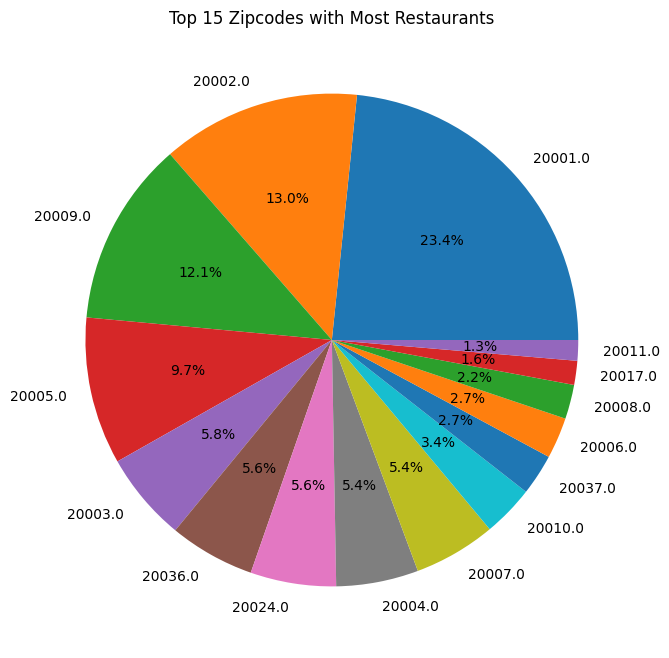

In [365]:
# NUMERICAL VARIABLES

# pie chart for zipcode
zip_counts = yelp_zip['zip_code'].value_counts()
top_15 = zip_counts.head(15)
top_15.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Top 15 Zipcodes with Most Restaurants')
plt.ylabel('')
plt.show()

In the pie-chart above, we get a sense of the spread of the restaurants throughout the DC area. We clearly see that zipcode 20001 (Northwest Quandrant - Mt Vernon Square) has the highest proportion of restaurants with 23.4%, followed by 20002 (Capitol Hill and H Street) with 13.0%, followed by 20009 (U Street Corridor and some of Dupont and Logan Circle) with 12.1% of the restaurants. The smallest proportions goes to 20017 (North Michigan Park) with 1.3%. The share of restaurants is skewed to the top 3 zipcodes, which make up nearly 50% of the restaurant share (48.5%), while the rest of the restaurant are relatively evenely dispersed amoung the remaining 12 zipcodes. 

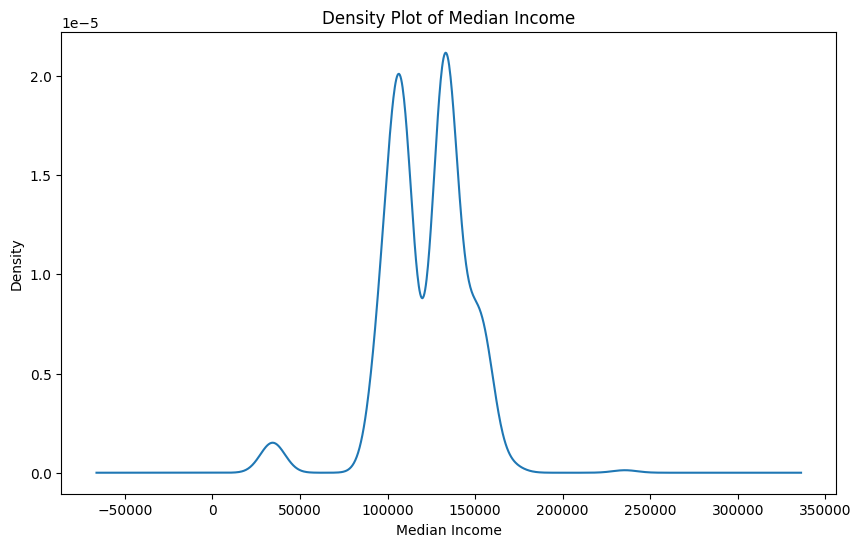

In [366]:
# distribution of median_income
yelp_zip['Median_Income'].plot(kind='kde', figsize=(10, 6))
plt.title('Density Plot of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Density')
plt.show()

The density plot above depicts the Median Income values of the zipcodes where the restaurants are located. The plot shows the distribution of the incomes, which shows that the income is centered somewhere around $125,000 and sees two peaks at around $100,000 and $150,000. The maximum value of the income is $235,511 and $34,252. It is interesting to note, that the minimum value is much lower and the maximum value is much higher than the US average median income which is $37,585, therefore, we see a very large range of income values, however, the majority sit near the $100,000 income level.

In [367]:
# max and min of median income
max_income = yelp_zip['Median_Income'].max()
min_income = yelp_zip['Median_Income'].min()
print(max_income)
print(min_income)

235511
34352


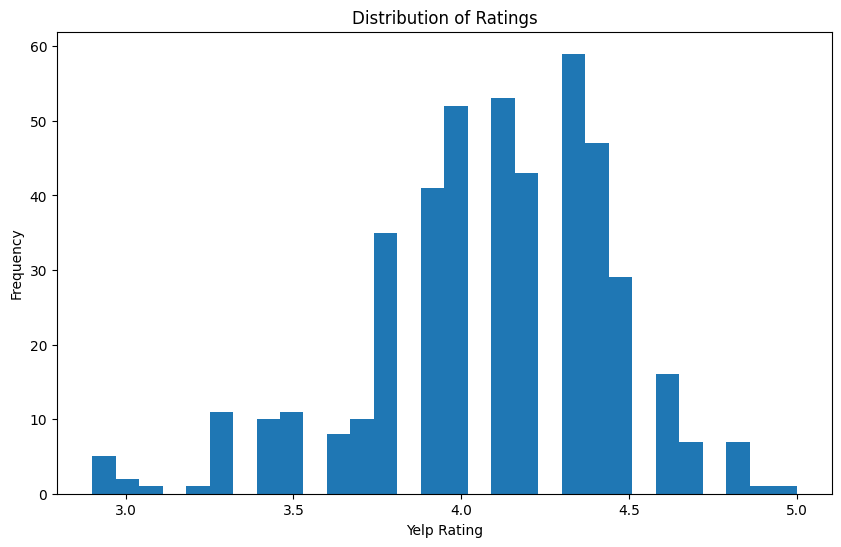

In [368]:
# distribution of rating
yelp_zip['rating'].plot(kind='hist', bins=30, figsize=(10, 6))
plt.title('Distribution of Ratings')
plt.xlabel('Yelp Rating')
plt.ylabel('Frequency')
plt.show()

The distribution of the Yelp Rating, shows that all of the restaurants received a rating above the 2.5 mark, meaning all are above average. In addition, the ratings seem to be centered around the 4.25 mark, meaning a large proportion of the restaurants in the dataset are relatively highly rated restaurants. There are even some near 5.0 ratings in the dataset. Overall, the dataset is very skewed towards the right, with mostly midlevel to highly rated restaurants. 

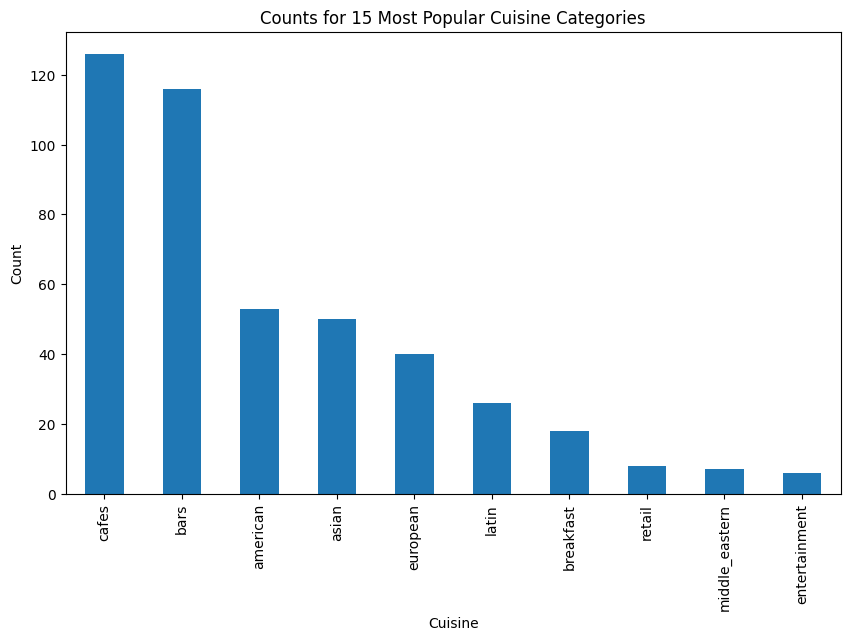

In [369]:
# CATEGORICAL VARIABLES

# bar chart of cuisine
cuisine_counts = yelp_zip['cuisine_cat'].value_counts()
cuisine_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Counts for 15 Most Popular Cuisine Categories')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

The histogram shows the number of restaurants that fall into each of the cuisine categories. We can clearly see the distribution of the types of cuisine offered at the restaurants in the dataset are highly skewed. The majority portion of restaurants are of the type cafes, followed closely by bars and pub style eateries. American, European, and Asian restaurants make up about the same proportions of about 50ish restaurants each. Latin and breakfast makes up about 25 restaurants. Middle Eastern and Retail-based restaurants make up about 15 restaurants, and entertainment-based has the small proportion with less than 15 total restaurants falling into this category. 

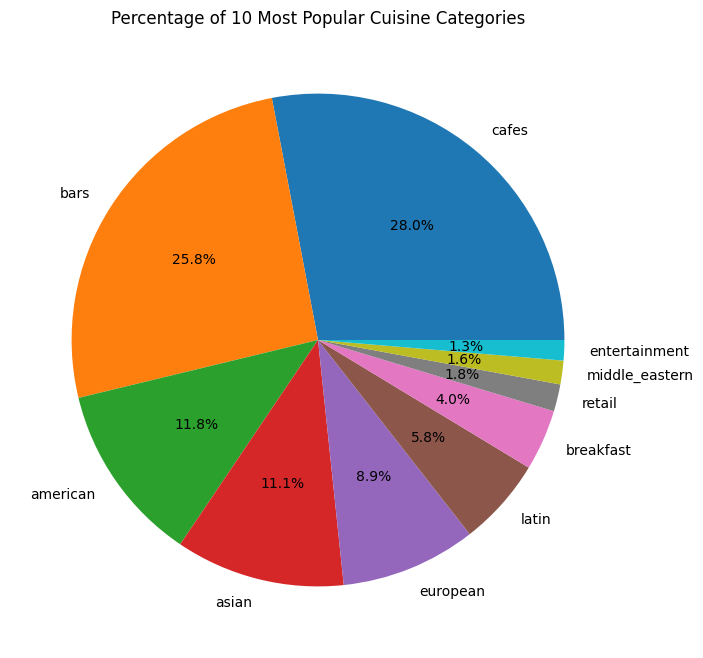

In [370]:
# pie chart
cuisine_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Percentage of 10 Most Popular Cuisine Categories')
plt.ylabel('')
plt.show()

The pie-chart shows the percentage of restaurants that fall into each cuisine category. Again, we can see that cafes and bars dominate with 28.0% and 25.8% of restaurants, respectively. Additionally, entertainment and Middle Eastern make up the lowest share with only 1.3% of all restaurants each.

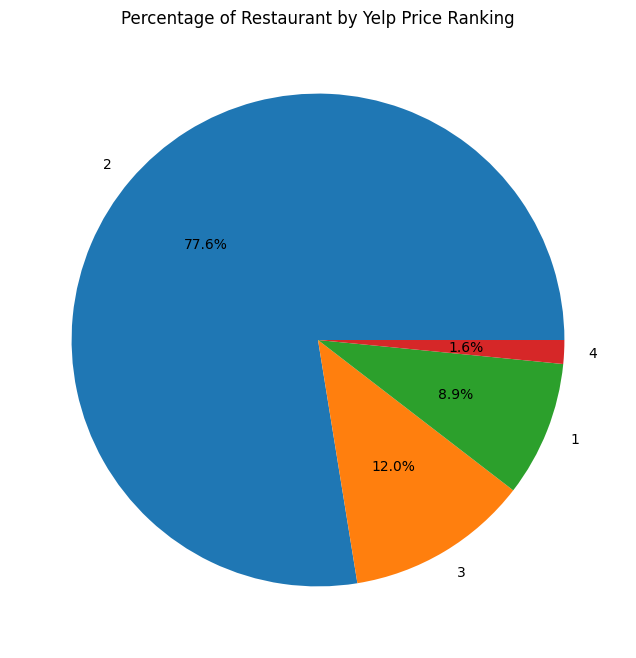

In [371]:
# pie chart of price_range
price_range = yelp_zip['price_range'].value_counts()
price_range.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Percentage of Restaurant by Yelp Price Ranking')
plt.ylabel('')
plt.show()

The pie chart shows the percentage of restaurants that fall into each of the Yelp price ranges, which indicate how expensive the average bill at the restaurant is, relatively. The number one price range represented is 2 dollar signs with 77.6%, which indicate an average cost per person for one meal to be $11-30. The second most is 3 dollar signs with 12.0%, which equates to $31-60 average. One dollar sign restaurants make up 8.9% which equates to under $10. Finally, there are only 1.6% four dollar sign restaurants, which are restaurants with the average cost per person above $61. This pie chart shows that are data is heavily skewed towards 2 dollar sign restaurants, which make relative sense because these would indicate mid-range average priced restaurants, which are most prevelant in the US and also correspond to the types of cuisines we are seeing in the dataset.

KEY INSIGHTS:
Bringing together the important insights from the initial EDA, we see that most of the restaurants are locating in 20001, 20002, and 20009 zipcodes and the median income of these zipcodes is centered around $125,000, however, the range is very large. The Yelp ratings are above average with all above 3.0 and heavily skewed to the right. Most of the restaurants in the dataset are cafes and bars, followed by some casual style restaurants. Finally, the restaurants are highly skewed towards mid level pricing, which is $11-30 per person per meal. 

### Bivariate and Multivariate Analysis

               Median_Income    rating
Median_Income       1.000000 -0.029846
rating             -0.029846  1.000000
               Median_Income  price_range
Median_Income       1.000000     0.054372
price_range         0.054372     1.000000
             price_range    rating
price_range     1.000000  0.048996
rating          0.048996  1.000000


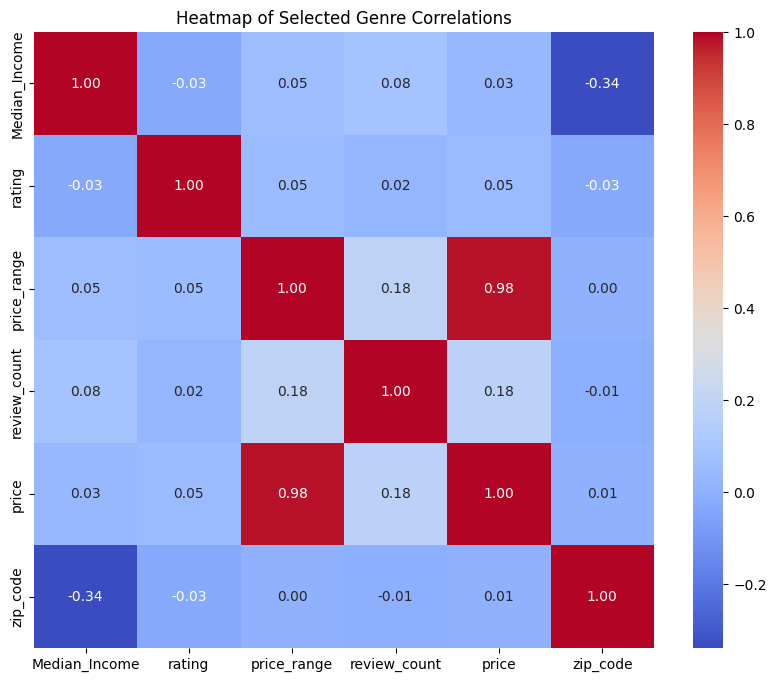

In [372]:
# CORRELATION ANALYSIS

# median_income and rating
correlation_matrix = yelp_zip[['Median_Income', 'rating']].corr()
print(correlation_matrix)

# median_income and price_range
correlation_matrix = yelp_zip[['Median_Income', 'price_range']].corr()
print(correlation_matrix)

# price_range and rating
correlation_matrix = yelp_zip[['price_range', 'rating']].corr()
print(correlation_matrix)

# Heat Map of Numeric
numeric_only = yelp_zip.filter(items=['Median_Income', 'rating', 'price_range', 'review_count', 'price', 'zip_code'])
corr = numeric_only.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Selected Genre Correlations')
plt.show()


The heatmap above shows the correlations between the numeric variables within the Yelp dataset. Interestingly, there is no strong correlation between any of the variables and the Yelp rating variable. This is indicating that the price/price_range, the number of reviews, the zipcode, and the median income of the restaurant area have no strong correlation with the yelp rating of the restaurant. There is a slight correlation between review_count and price/price_range of the restaurants, which could preliminarily indicate that more reviews correlates with a higher price range, however, the correlation value is quite small at only 0.18. For note, the 0.98 correlation score between price and price_range can be ignored, as they are intentionally correlated because price is a manufactured variable. 

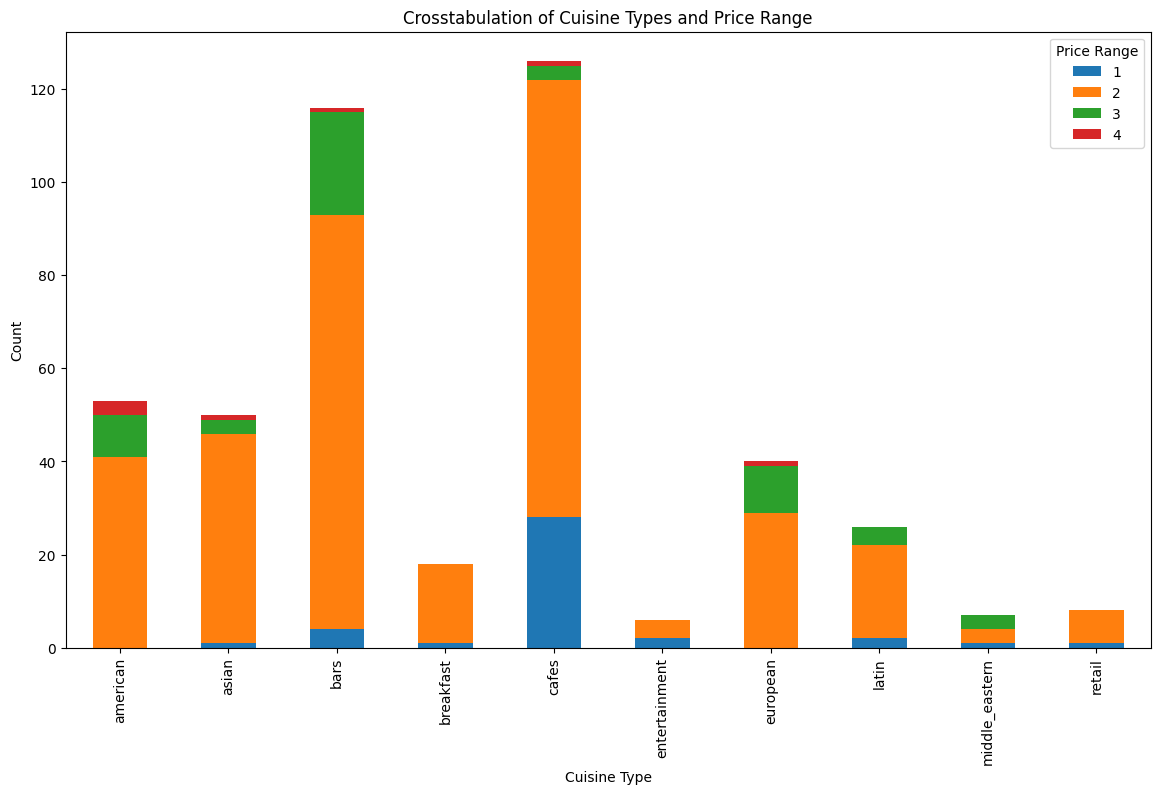

In [373]:
# CROSSTABULATIONS

# cuisine, price_range
cuisine_price_crosstab = pd.crosstab(yelp_zip['cuisine_cat'], yelp_zip['price_range'])
cuisine_price_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Crosstabulation of Cuisine Types and Price Range')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.legend(title='Price Range')
plt.show()

Here, we see a crosstabulation of cuisine types and price ranges. Due to the fact we visualized above, that most of the restaurants are in the $11-30 (2) price range, we see that trend reappearing here. However, we can now get a better sense of what is driving that trend and where the other price ranges are occuring. We see that the majority of the low range restaurants are cafes, which intuitively makese sense as cafes specialize in drinks that are below the $11 mark. There are also some low range-restaurants in the bars category, which again is likely because some bars only serve drinks, which would be less expensive than ordering a meal at a restaurant. We can also see that there are some higher mid level restaurants (3) occuring in the bars, European and American categories. The most high-level restaurants are occurring in the American category, which could be because of the inclusion of steakhosuse and other traditionally more expensive restaurant experiences. Middle-eastern is interstingly almost evenly split between low, mid, and high-mid level restaurants.  

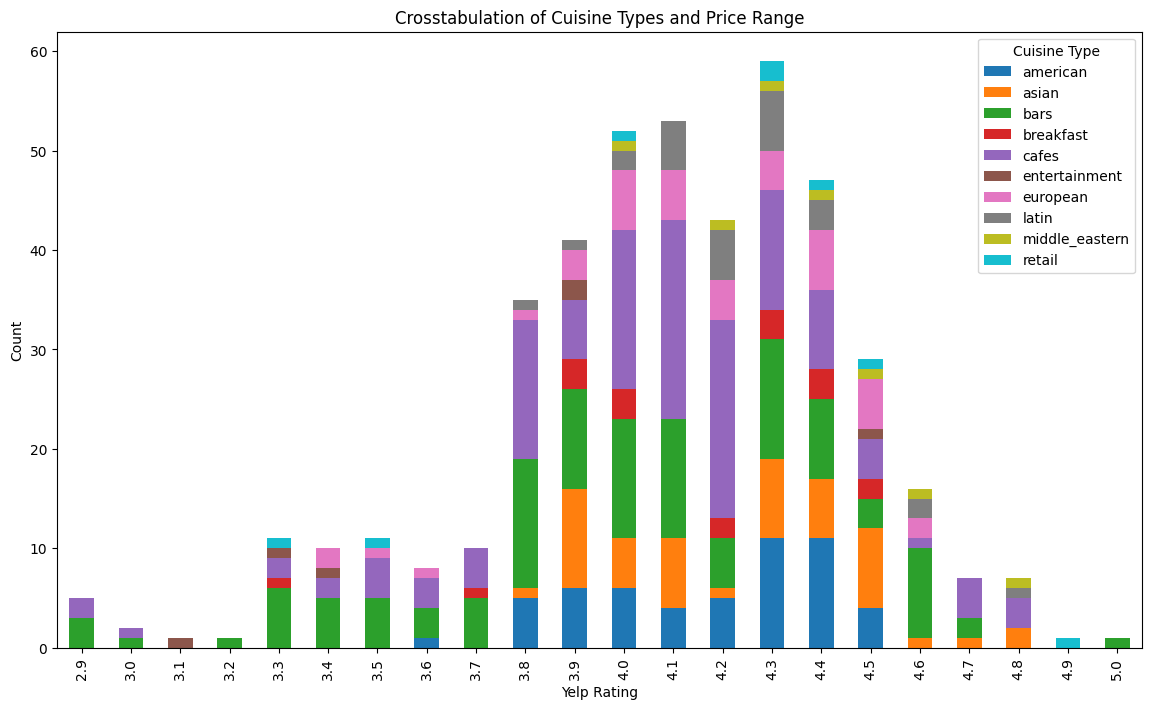

In [374]:
# cuisine, price_range
cuisine_price_crosstab = pd.crosstab(yelp_zip['rating'], yelp_zip['cuisine_cat'])
cuisine_price_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Crosstabulation of Cuisine Types and Price Range')
plt.xlabel('Yelp Rating')
plt.ylabel('Count')
plt.legend(title='Cuisine Type')
plt.show()

This plot shows the crosstabulation of yelp rating and cuisine type. We can see all of the 5.0 yelp ratings are bars and all the 4.9 ratings are retail-based restaurants. The lowest yelp ratings of 2.9 and 3.0 are composed of bars and cafes. It is interesting that bars make up both the highest and lowest yelp ratings in the dataset. The mid-range yelp ratings have a pretty even spread of cuisine types. Bars and cafes seem to have the most range of ratings, both occurring in almost every yelp rating score.

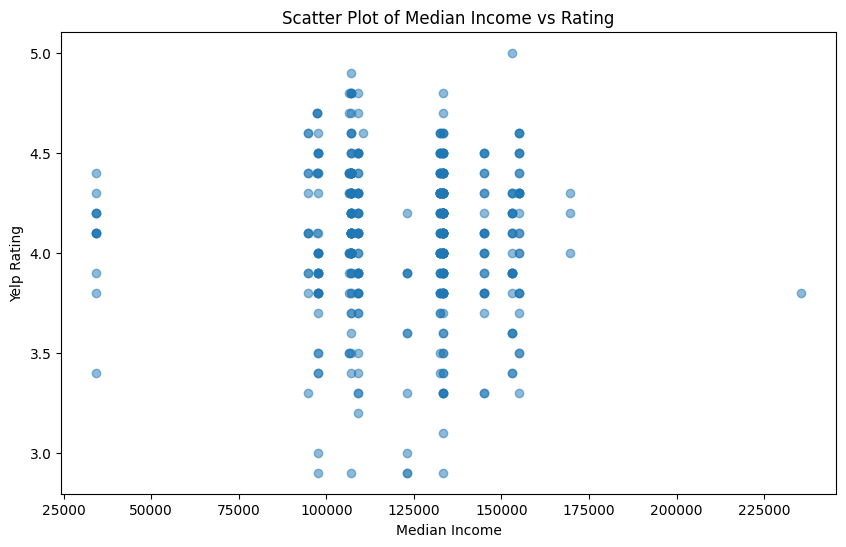

In [375]:
# FEATURE PAIRINGS
# rating is the target, with Median_Income or Zipcode as the feature

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(yelp_zip['Median_Income'], yelp_zip['rating'], alpha=0.5)
plt.title('Scatter Plot of Median Income vs Rating')
plt.xlabel('Median Income')
plt.ylabel('Yelp Rating')
plt.show()

This figure is a scatter plot between median income of the zipcode and the yelp rating score. There does not seem to be much correlation between the two variables, as each value of median income covers a majority of the range of yelp rating scores. There is one outlier in the median income variable, which is much higher than the other values and interestly has a relatively lower yelp rating score of about 3.75. The lowest yelp rating scores occur mostly in the middle of the income range near 100,000 and 125,000.

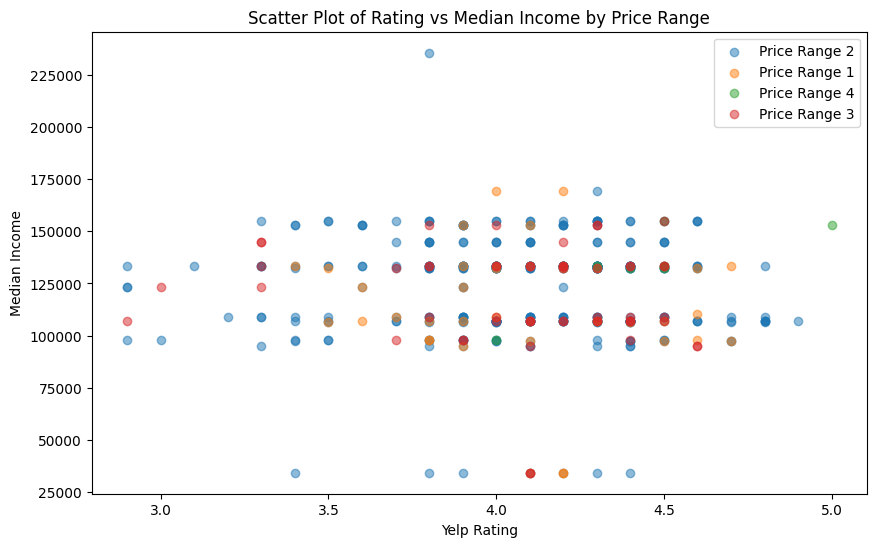

In [376]:
# scatter plot by price_range
plt.figure(figsize=(10, 6))
for price in yelp_zip['price_range'].unique():
    subset = yelp_zip[yelp_zip['price_range'] == price]
    plt.scatter(subset['rating'], subset['Median_Income'], alpha=0.5, label=f'Price Range {price}')
plt.title('Scatter Plot of Rating vs Median Income by Price Range')
plt.xlabel('Yelp Rating')
plt.ylabel('Median Income')
plt.legend()
plt.show()

The plot above is Median Income versus Yelp Rating by the price range. Again, we see almost no correlation or observable pattern between the variables.

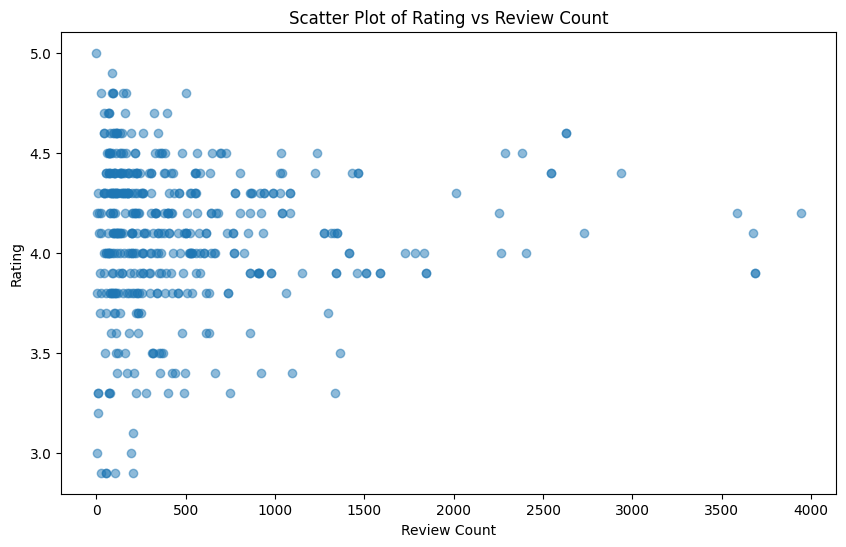

In [377]:
# number of ratings
plt.figure(figsize=(10, 6))
plt.scatter(yelp_zip['review_count'], yelp_zip['rating'], alpha=0.5)
plt.title('Scatter Plot of Rating vs Review Count')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

The plot shows the yelp rating versus the count of Yelp reviews. There seems to a bit of correlation between having more reviews and having a generally higher yelp score, however, there are also outliers to this where there are restauratns with very few review counts that have 5.0 or near ratings. Thus, there is no conclusive correlation between number of reviews and rating.

### Stastical Insights

In [378]:
# pearson correlation
from scipy.stats import pearsonr

corr, p_value = pearsonr(yelp_zip['rating'], yelp_zip['Median_Income'])
print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: -0.02984633670000559
P-value: 0.5277030931732456


These are the results of Pearson Correlation test, which tells us if there is a linear correlation betwen the variable yelp rating and median income of the restaurant zip code area. The correalation value of -0.0298 tells us that there is a negative correlation between the variables, however, that the correlation value is negligibe because it is such a small value. We also cannot reject the null that the correlation coefficient is significantly different from zero because the p-value is larger than 0.05.

In [379]:
# chi-square for cuisine type and price range
contingency_table_cuisine_price = pd.crosstab(yelp_zip['cuisine_cat'], yelp_zip['price_range'])
chi2_cuisine_price, p_cuisine_price, dof_cuisine_price, expected_cuisine_price = chi2_contingency(contingency_table_cuisine_price)
print(f"Chi-square statistic: {chi2_cuisine_price}")
print(f"P-value: {p_cuisine_price}")
print(f"Degrees of freedom: {dof_cuisine_price}")

Chi-square statistic for cuisine type and price range: 88.02282061045997
P-value: 2.1757083555588532e-08
Degrees of freedom: 27


Here we are utilzing a chi-square test testing whether there is an association between the two variables. Due to the p-value being less than 0.05 at 0.00016, we can reject the null hypothesis that there is no association between cuisine type and price range of a restaurant. This essentially tells us that the price range distribution is distinct for each cuisine type.

In [380]:
# ANOVA for ratings and cuisine type
anova_result = f_oneway(*(yelp_zip[yelp_zip['cuisine'] == cuisine]['rating'] for cuisine in yelp_zip['cuisine'].unique()))
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA F-statistic: 1.7284899760516406
P-value: 0.0002978259627161217


The ANOVA test if there is a difference amoung the means of the ratings across the cuisine categories(original ones provided by Yelp). Since the p-value is 0.00029 and less than 0.05, we can reject the null hypothesis, that there is no difference in the mean ratings across the cuisine categories.

In [381]:
# pearson correlation for price and review_count
corr, p_value = pearsonr(yelp_zip['review_count'], yelp_zip['price_range'])
print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: 0.1843341274624608
P-value: 8.382362252656797e-05


These are the results of Pearson Correlation test, which tells us if there is a linear correlation betwen the variables price range and review count. The correalation value of 0.1843 tells us that there is a slight positive correlation between the variables. With the p-value of less than 0.05, we can reject the null that the correlation coefficient is significantly different from zero, meaning there is a correlation between having more reviews and having a higher price range of a restaurant. 

In [382]:
# pearson correlation for rating and review_count
corr, p_value = pearsonr(yelp_zip['review_count'], yelp_zip['rating'])
print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: 0.02270387698144081
P-value: 0.6309825721365131


The results of Pearson Correlation test tells us about the linear correlation between rating and review count. The correalation value of 0.2227 tells us that there is a slight positive correlation between the variables. However, with the p-value greater than 0.05, we cannot reject the null that the correlation coefficient is significantly different from zero.

In [383]:
# ANOVA for median income and price range
anova_result = f_oneway(*(yelp_zip[yelp_zip['price_range'] == cuisine]['Median_Income'] for cuisine in yelp_zip['price_range'].unique()))
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA F-statistic: 2.566278770137073
P-value: 0.05402769001570957


The ANOVA test if there is a difference amoung the means of median income across the price range groups. Since the p-value is 0.054, we can reject the null hypothesis, at the 10% significance level, that there is no difference in the mean incomes across the price categories. 

## Summary and Interpretaion of Results

Following extensive exploratory data analysis and hypothesis testing, we have some important and interesting findings. For starters, we found that most restaurnats in DC are found in the zipcodes 20001, 20002, and 20009 and that restaurants in DC are overall higher than average with all scores above a 3.0 rating. There are also a large portion of restaurants and bars in the DC area and most of the restaurants fall in the $11-30 per meal per person range. We then saw a slight positive correlation between the number of yelp views and the price range of the restaurant. Interestingly, there seemed to be no significant correlations between the yelp rating and any of the other variables. The highest ratings, however, went to bars and the lowest went to bars and cafes. We then attempted to statistically investigate these findings. This yielded a non-significant correlation between median income and yelp rating. There was, however, a positive and significant correlation between the review count and the price of the restaurant, following what was seen previously. There was an insignificant correlation between the review count and the yelp rating, which is a good sanity check that simply having more reviews leads to a skewed and biased rating. Finally, the mean rating across the cuisine category and the the mean income across the price ranges were significantly different. Taken together, these results lead to some interpretations. For one, it seems customers are more likely to leave a review on a restaurant if they paid more for the experience, indicating price might make a person more hyperaware of their opinion of a restaurant. Additionally, it is clearly hard to predict a Yelp score based solely on some basic information about the restaurant, there is clearly a lot more nuance about what constitutes a good yelp score, and further a good restaurant. Finally, it seems that better neighborhoods don't necessarily have better restaurants, at least for the DC areas and according to the people spending the time to leave Yelp reviews. 